# Homework 1 Bioengineering 599 Control
# Jacob Evarts 01/31/24

**comments**: 25/25. Nice problem and analysis;. The one concern is the width of the staircase. See below.

## Installs & Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tellurium as te
import controlSBML as csbml

## Problem Statement & Control Objectives

Cancer and its causes is a field that has recieved much attention, and mitigating the chance of cancer with lifestyle changes is ideal over other more invasive treatments. [This model](https://www.ebi.ac.uk/biomodels/BIOMD0000001042#Overview) investigates how the consumptions of vitamins in the diet affects the progression of a tumor in a healthy cell context. The authors claim that different combinations of vitamins can keep healthy cells alive where they would otherwise be wiped out by the tumor cell population. Therefore, the model input is vitamins and the output species of interest are healthy and tumor cells. The control objectives will be:
1. Minimize tumor growth for the first 30 days of treatment (although vitamins alone certainly won't eliminate the tumor)
2. Maintain a nonzero (>0) healthy cell population for the first 30 days of treatment 
3. The vitamin operating range will be [0, 10] (high levels of vitamins could be incur unacceptable levels of toxicity)

If these objectives can be achieved it would give insight into a dietary intervention for cancer that could be prevent more serious later stage cases.

## System Exploration

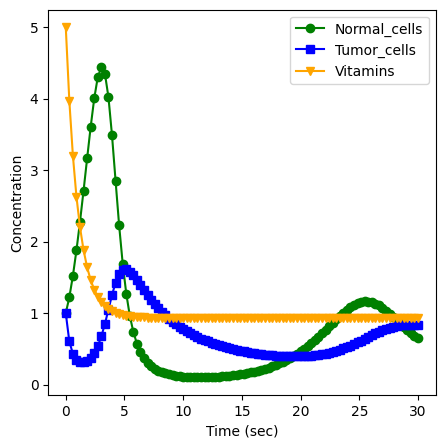

In [2]:
url = "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL2108260003/3/Alharbi2019%20TNVM.xml"
ctlsb = csbml.ControlSBML(url, times=np.linspace(0, 30, 100), input_names=["Vitamins"], output_names=["Normal_cells", "Tumor_cells"], is_fixed_input_species=True)
ts = ctlsb.plotModel()

[]

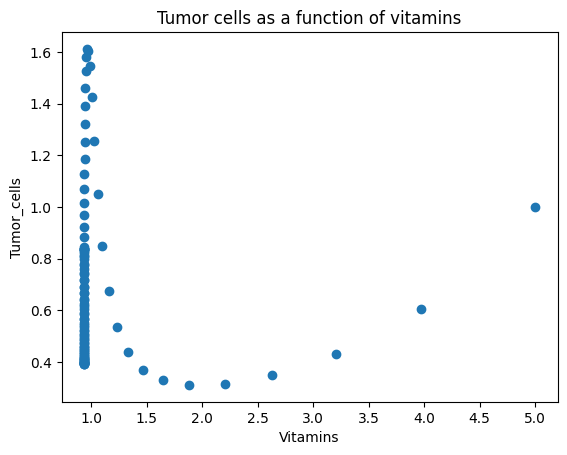

In [3]:
plt.scatter(ts["Vitamins"], ts["Tumor_cells"])
plt.title("Tumor cells as a function of vitamins")
plt.xlabel("Vitamins")
plt.ylabel("Tumor_cells")
plt.plot() 

[]

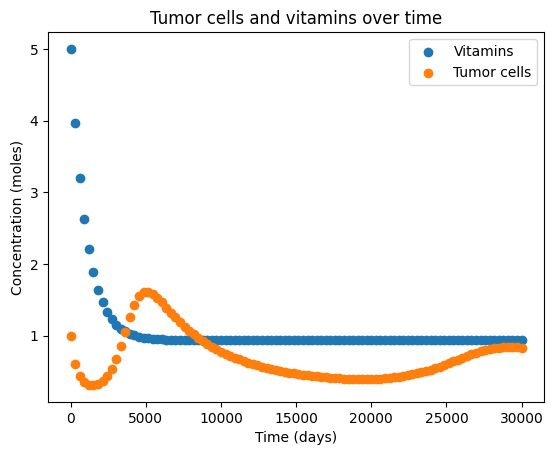

In [4]:
plt.scatter(ts.index, ts["Vitamins"])
plt.scatter(ts.index, ts["Tumor_cells"])
plt.title("Tumor cells and vitamins over time")
plt.xlabel("Time (days)")
plt.ylabel("Concentration (moles)")
plt.legend(["Vitamins", "Tumor cells"])
plt.plot()

## Staircase response for healthy cells

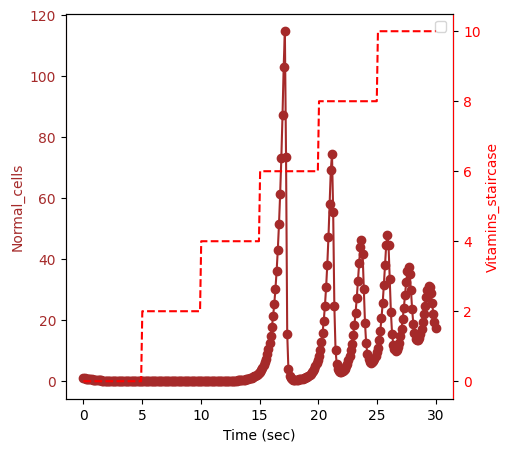

In [5]:
ctlsb = csbml.ControlSBML(url, times=np.linspace(0, 30, 300), input_names=["Vitamins"], output_names=["Normal_cells"], is_fixed_input_species=True)
_ = ctlsb.plotStaircaseResponse(initial_value=0, final_value=10)

It appears that this operating range is too large. The next step will be narrowing it down to a more sensitive range.

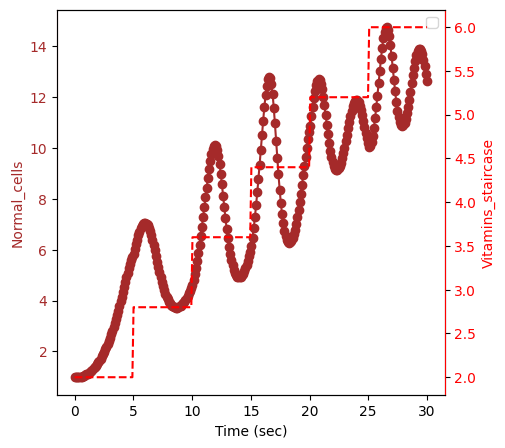

In [6]:
ctlsb = csbml.ControlSBML(url, times=np.linspace(0, 30, 300), input_names=["Vitamins"], output_names=["Normal_cells"], is_fixed_input_species=True)
_ = ctlsb.plotStaircaseResponse(initial_value=2, final_value=6)

**comment**: You still have a lot of dynamics at the time constants you're using. Look what happens when I make the steps wider.

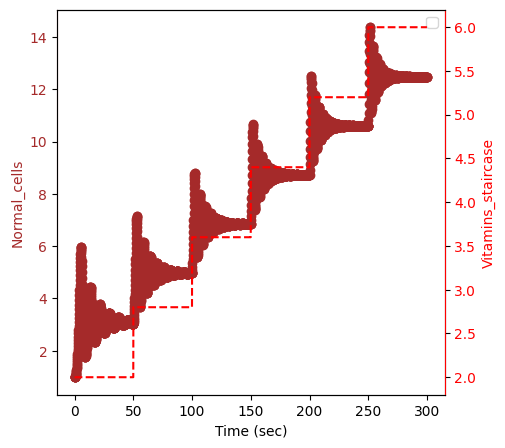

In [8]:
ctlsb = csbml.ControlSBML(url, times=np.linspace(0, 300, 3000), input_names=["Vitamins"], output_names=["Normal_cells"], is_fixed_input_species=True)
_ = ctlsb.plotStaircaseResponse(initial_value=2, final_value=6)

## Staircase response for tumor cells

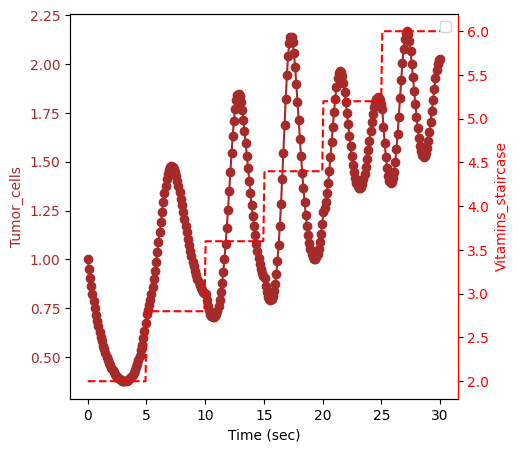

In [7]:
ctlsb = csbml.ControlSBML(url, times=np.linspace(0, 30, 300), input_names=["Vitamins"], output_names=["Tumor_cells"], is_fixed_input_species=True)
_ = ctlsb.plotStaircaseResponse(initial_value=2, final_value=6)

## System Definition

1. SBML model: https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL2108260003/3/Alharbi2019%20TNVM.xml

2. Output: Tumor cells, healthy cells

3. Input: Vitamins

4. Direction effect of input: Increasing oscilatory 

5. Operating region: [2, 6]

6. Range of outputs that can be achieved: [0, 120] 

Both cell types have similar responses to stepping up the vitamin concentration. It is worth noting that with a static vitamin concentration of 0, the healthy cells will completely die out and the cancer cells will propagate. It appears that when vitamin concentration increases there is an initial growth of healthy cells, which after a short lag is followed by the growth of tumor cells. With this in mind it would be interesting to try a series of vitamin interventions as opposed to keeping the level constant, which would also better represent the real effects of eating meals over time with vitamins. 